In [1]:
import sys
sys.path.append('../')
from read_data_functions import *
from plot_functions import *
from calculations import *
plt.style.use('../Style.mplstyle')
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # suppress warnings

In [2]:
path = '../../../Data/Old data/'
AMS_paths = ['220505_ramp_carene_258K/', '220518_ramp_apinene_258K/', '220608_ramp_apinene_293K/']

AMS = {}
for AMS_path in AMS_paths:
    df = import_txt(f'{path}{AMS_path}AMS/', '', 't_series', '%d-%m-%Y %H:%M:%S', 0)
    name = AMS_path.split('_')[0]
    for key in df.keys():            
        if 'PToF' in key:
            AMS[key] = df[key]

In [3]:

print(AMS.keys())
print(len(AMS['220608_AveragePToF']['dsig_all']))

count_zero = 0
count_inf = 0
for dsig in AMS['220608_AveragePToF']['dsig_all']:
    if dsig == 0:
        count_zero += 1
    if str(dsig) == 'inf':
        count_inf += 1
print(f'Zero: {count_zero}, inf: {count_inf}')

count = 0
for key in AMS['220608_PToF'].keys()[:255]:
    if 'Org' in key:
        count += 1
print(count)

print(AMS['220608_PToF'].keys()[1], AMS['220608_PToF'].keys()[254])     # 't_series' has position 0
print(AMS['220608_PToF'].keys()[255], AMS['220608_PToF'].keys()[508])
print(AMS['220608_PToF'].keys()[509], AMS['220608_PToF'].keys()[762])
print(AMS['220608_PToF'].keys()[763], AMS['220608_PToF'].keys()[1016])
print(AMS['220608_PToF'].keys()[1017], AMS['220608_PToF'].keys()[1270])

dict_keys(['220505_AveragePToF', '220505_PToF', '220518_AveragePToF', '220518_PToF', '220608_AveragePToF', '220608_PToF'])
254
Zero: 17, inf: 98
254
ug_log_Orgim_all[][0] ug_log_Orgim_all[][253]
ug_log_NO3im_all[][0] ug_log_NO3im_all[][253]
ug_log_SO4im_all[][0] ug_log_SO4im_all[][253]
ug_log_NH4im_all[][0] ug_log_NH4im_all[][253]
ug_log_Chlim_all[][0] ug_log_Chlim_all[][253]


In [4]:
count_zero = 0
count_inf = 0
for dsig in AMS['220608_AveragePToF']['dsig_all'][17:156]:
    if dsig == 0:
        count_zero += 1
    if str(dsig) == 'inf':
        count_inf += 1
print(f'Zero: {count_zero}, inf: {count_inf}')

count = 0
for key in AMS['220608_PToF'].keys()[18:157]:
    count += 1
print(count)

print(AMS['220608_PToF'].keys()[18], AMS['220608_PToF'].keys()[156])
print(AMS['220608_PToF'].keys()[272], AMS['220608_PToF'].keys()[410])
print(AMS['220608_PToF'].keys()[526], AMS['220608_PToF'].keys()[664])
print(AMS['220608_PToF'].keys()[780], AMS['220608_PToF'].keys()[918])
print(AMS['220608_PToF'].keys()[1034], AMS['220608_PToF'].keys()[1172])

Zero: 0, inf: 0
139
ug_log_Orgim_all[][17] ug_log_Orgim_all[][155]
ug_log_NO3im_all[][17] ug_log_NO3im_all[][155]
ug_log_SO4im_all[][17] ug_log_SO4im_all[][155]
ug_log_NH4im_all[][17] ug_log_NH4im_all[][155]
ug_log_Chlim_all[][17] ug_log_Chlim_all[][155]


In [5]:
print(AMS['220608_PToF'].keys()[18], AMS['220608_PToF'].keys()[156])
print(AMS['220608_PToF'].keys()[254+18], AMS['220608_PToF'].keys()[254+156])
print(AMS['220608_PToF'].keys()[2*254+18], AMS['220608_PToF'].keys()[2*254+156])
print(AMS['220608_PToF'].keys()[3*254+18], AMS['220608_PToF'].keys()[3*254+156])
print(AMS['220608_PToF'].keys()[4*254+18], AMS['220608_PToF'].keys()[4*254+156])

ug_log_Orgim_all[][17] ug_log_Orgim_all[][155]
ug_log_NO3im_all[][17] ug_log_NO3im_all[][155]
ug_log_SO4im_all[][17] ug_log_SO4im_all[][155]
ug_log_NH4im_all[][17] ug_log_NH4im_all[][155]
ug_log_Chlim_all[][17] ug_log_Chlim_all[][155]


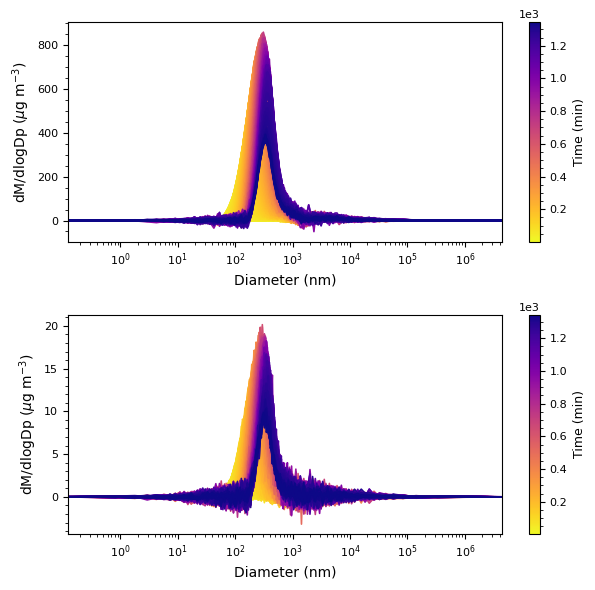

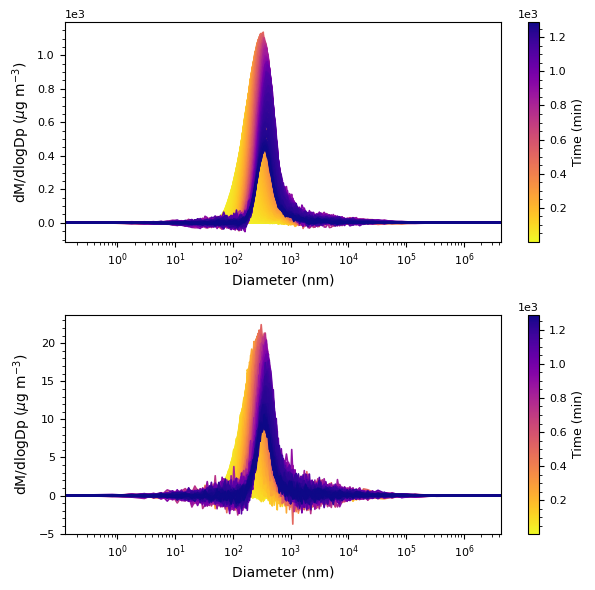

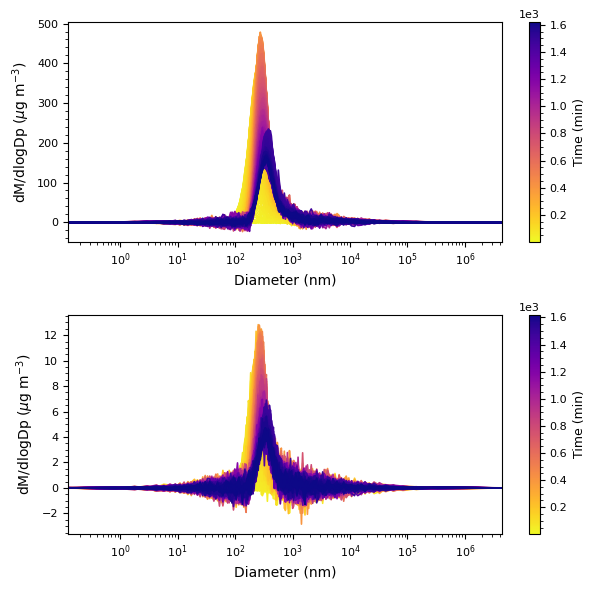

In [14]:
start_times = ['2022-05-05 14:48', '2022-05-18 14:34', '2022-06-08 10:20']
timestamps = [['2022-05-05 14:32', '2022-05-06 12:56'],
              ['2022-05-18 14:21', '2022-05-19 11:44'],
              ['2022-06-08 09:59', '2022-06-09 12:57']]
PToF_bins = []
for size in AMS['220608_AveragePToF']['dsig_all'][16:156]:
    PToF_bins.append(float(size))

for key in ['220505_PToF', '220518_PToF', '220608_PToF']:
    fig, ax = plt.subplots(2, 1, figsize = (6.3, 6))

    for i in range(2):
        df_keys = AMS[key].keys()[i*254+18:i*254+157]
        AMS_running = running_mean(AMS[key], df_keys, 'Time', '2T', 2, None)

        plot_running_sizedist(fig, ax[i], AMS_running.T, PToF_bins[1:], None, ['Diameter (nm)', 'dM/dlogDp ($\mu$g m$^{-3}$)'], 2, False)
    
    fig.tight_layout()

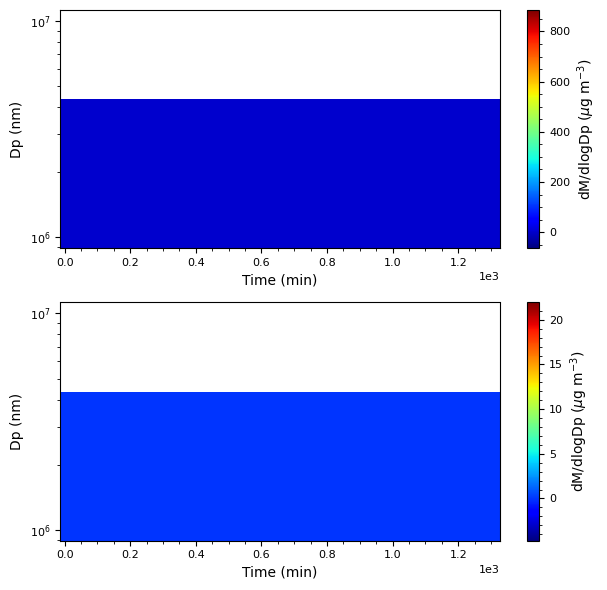

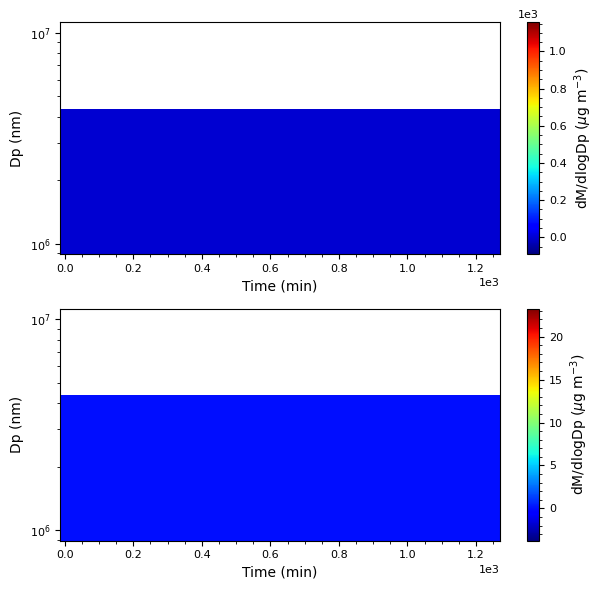

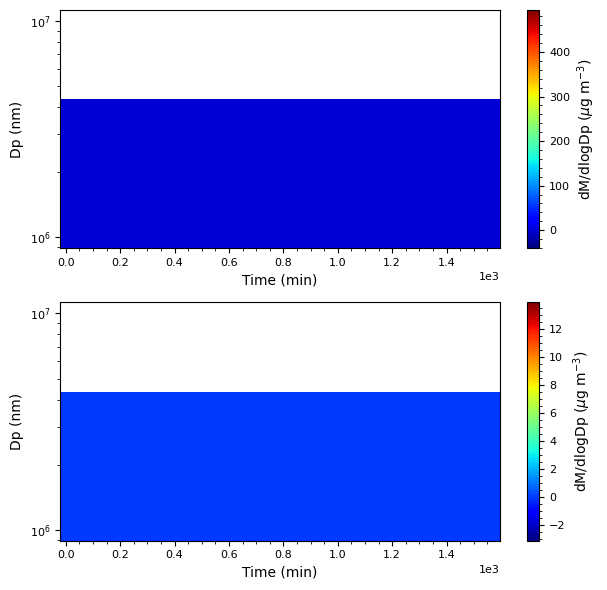

In [22]:
for i, key in enumerate(['220505_PToF', '220518_PToF', '220608_PToF']):
    fig, ax = plt.subplots(2, 1, figsize = (6.3, 6))

    for j in range(2):
        df_keys = AMS[key].keys()[j*254+18:(j)*254+157].to_list()
        plot_timeseries(fig, ax[j], AMS[key], df_keys, PToF_bins, 'mass', timestamps[i], True, None, None, False, start_times[i])
    
    fig.tight_layout()